In [1]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

# Parameters for synthetic data generation
start_date = datetime(2025, 1, 16)
num_days = 252 * 2 # Typical number of trading days in a year
initial_close = 585.25

# Lists to hold generated data
dates = []
closes = []
volumes = []
opens = []
highs = []
lows = []

# Generate data
for i in range(num_days):
    date = start_date - timedelta(days=i)
    dates.append(date.strftime("%m/%d/%Y"))

    # Generate close price using Poisson distribution with Gaussian noise
    if i == 0:
        close_price = initial_close
    else:
        # Poisson distribution to simulate daily price changes
        price_change = np.random.poisson(lam=0) + np.random.normal(
            0, 2
        )  # Adjust lam and stddev as needed
        close_price += price_change

    closes.append(round(close_price, 2))

    # Generate other fields based on close price
    volume = np.random.randint(5000000, 15000000)  # Random volume between 5M and 15M
    open_price = round(
        close_price + np.random.normal(0, 1), 2
    )  # Open price close to the close price
    high_price = round(
        max(open_price, close_price) + np.random.uniform(0, 5), 2
    )  # High price slightly above close or open
    low_price = round(
        min(open_price, close_price) - np.random.uniform(0, 5), 2
    )  # Low price slightly below close or open

    volumes.append(volume)
    opens.append(open_price)
    highs.append(high_price)
    lows.append(low_price)

# Create DataFrame and save to CSV
data = {
    "Date": dates,
    "Close": closes,
    "Volume": volumes,
    "Open": opens,
    "High": highs,
    "Low": lows,
}

df = pd.DataFrame(data)
df.to_csv("synthetic_stock_data.csv", index=False)

print("Synthetic stock data generated and saved to 'synthetic_stock_data.csv'.")

Synthetic stock data generated and saved to 'synthetic_stock_data.csv'.


In [2]:
import pandas as pd
import numpy as np
import talib as ta


df = pd.read_csv("synthetic_stock_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    504 non-null    object 
 1   Close   504 non-null    float64
 2   Volume  504 non-null    int64  
 3   Open    504 non-null    float64
 4   High    504 non-null    float64
 5   Low     504 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 23.8+ KB


In [3]:
df.Date = pd.to_datetime(df.Date)
df.sort_values(by="Date", ascending=True, inplace=True)
df['sma9'] = ta.SMA(df['Close'].to_numpy(), 9)
df['sma21'] = ta.SMA(df['Close'].to_numpy(), 21)
df.head(10)

,Date,Close,Volume,Open,High,Low,sma9,sma21
503,2023-09-01,554.16,6785778,553.50,555.23,549.05,NaN,NaN
502,2023-09-02,552.13,9642023,553.45,555.47,549.28,NaN,NaN
501,2023-09-03,554.26,14078622,553.68,555.36,550.61,NaN,NaN
500,2023-09-04,552.30,11274148,553.55,556.28,548.57,NaN,NaN
499,2023-09-05,552.25,5196841,551.49,554.13,548.46,NaN,NaN
498,2023-09-06,552.35,14108622,550.28,554.44,546.49,NaN,NaN
497,2023-09-07,550.45,9700764,551.08,554.95,547.63,NaN,NaN
496,2023-09-08,550.20,9632038,550.46,553.64,548.51,NaN,NaN
495,2023-09-09,547.71,14566252,548.45,550.01,544.60,551.756667,NaN
494,2023-09-10,548.29,11441280,548.60,552.78,546.63,551.104444,NaN


In [4]:
import plotly.graph_objects as go

df["Date"] = pd.to_datetime(df.Date)

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                      ])

fig.update_layout(
    title=dict(text='Something'),
    yaxis=dict(
      title=dict(
        text='Some Coin'
        )
    ),
    shapes = [dict(
        x0='2023-09-01', x1='2023-09-01', y0=300, y1=1000, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2023-09-01', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')],
    xaxis_rangeslider_visible=False
)

fig.show()

In [5]:
!pip install binance-connector


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
BINANCE_API_KEY="wVR8L0aSLXokmsWf0NauyOHI6iqkpxFZjhT2aIrNRNjy8E21RktANP6F2boLjfUB"
BINANCE_SECRET_KEY="9m8YabFlHqnLzUZIkCOb4NIgwJFLBi8mOyxeACcdm0evj7WUgrg3V681UeMQOAK0"

In [3]:
!pip install binance-connector

In [11]:

df_orig = df

In [12]:
df.head()

,Date,Close,Volume,Open,High,Low,sma9,sma21
503,2023-09-01,567.62,5263235,567.97,571.25,564.84,NaN,NaN
502,2023-09-02,568.44,12243617,568.73,571.80,566.43,NaN,NaN
501,2023-09-03,567.79,11168580,568.39,570.98,565.24,NaN,NaN
500,2023-09-04,567.11,6205572,565.51,570.29,563.87,NaN,NaN
499,2023-09-05,566.48,12058144,567.84,569.95,565.11,NaN,NaN


In [16]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import talib as ta
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Load data
# df_orig = get_historical_klines(limit= 252 * 4, interval='1d')
df = df_orig.copy()

# df['Date'] = pd.to_datetime(df['Timestamp'], unit="s")
df.sort_values(by="Date", ascending=True, inplace=True)

# Calculate SMAs
df['sma100'] = ta.SMA(df['Close'].to_numpy(), timeperiod=100)

# Generate signals
df['Signal'] = 0  # Default no signal

df['Signal'][100:] = np.where(df['Close'][100:] > df['sma100'][100:], 1, 0)  # Buy signal when close > sma100
df['Signal'][100:] = np.where(df['Close'][100:] < df['sma100'][100:], -1, df['Signal'][100:])  # Sell signal when close < sma100

# Generate signals using .loc to avoid ChainedAssignmentError
# df.loc[100:, 'Signal'] = np.where(df['Close'][100:] > df['sma100'][100:], 1, 0)  # Buy signal when close > sma100
# df.loc[100:, 'Signal'] = np.where(df['Close'][100:] < df['sma100'][100:], -1, df.loc[100:, 'Signal'])  # Sell signal when close < sma100


# Create a list for annotations
annotations = []
for i in range(1, len(df)):
    if df['Signal'].iloc[i] == 1 and df['Signal'].iloc[i-1] != 1:
        annotations.append(dict(x=df['Date'].iloc[i], y=df['Close'].iloc[i],
                                 ax=0, ay=-10, xref='x', yref='y',
                                 showarrow=True, arrowhead=2,
                                 text='BUY', font=dict(color='purple')))
    elif df['Signal'].iloc[i] == -1 and df['Signal'].iloc[i-1] != -1:
        annotations.append(dict(x=df['Date'].iloc[i], y=df['Close'].iloc[i],
                                 ax=0, ay=10, xref='x', yref='y',
                                 showarrow=True, arrowhead=2,
                                 text='SELL', font=dict(color='blue')))

# Create the candlestick chart with SMAs
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                      open=df['Open'], high=df['High'],
                                      low=df['Low'], close=df['Close'], name="Candles")],)

# Add SMAs to the figure
fig.add_trace(go.Scatter(x=df['Date'], y=df['sma100'], mode='lines', name='SMA 100', line=dict(color='orange', width=1)))

# Update layout with annotations and title
fig.update_layout(
    title=dict(text='BTC~USDT with Buy/Sell Signals'),
    yaxis=dict(title=dict(text='Price')),
    shapes=[dict(
        x0='2023-09-01', x1='2023-09-01', y0=300, y1=1000, xref='x', yref='paper',
        line_width=2)],
    annotations=annotations,
    xaxis_rangeslider_visible=False
)

# Show the figure
fig.show()


### RSI Divergence

In [ ]:
import pandas as pd
import numpy as np
import talib # Import TA-Lib
from scipy.signal import find_peaks
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from binance.spot import Spot

def get_historical_klines(
    interval: str = "1m",
    limit: int = 30,
    symbol: str = "BTCUSDT",
) -> pd.DataFrame:
    # api key/secret are required for user data endpoints
    client = Spot(
        base_url="https://api2.binance.com", api_key=BINANCE_API_KEY, api_secret=BINANCE_SECRET_KEY
    )

    #  Get candlestick data for BNBUSDT at 1h interval
    klines = client.klines(symbol=symbol, interval=interval, limit=limit)

    # Convert to DataFrame and select OHLC columns
    df = pd.DataFrame(
        klines,
        columns=[
            'Timestamp',
             'Open',
             'High',
             'Low',
             'Close',
             'Volume',
             'Close_time',
             'Quote_asset_volume',
             'Number_of_trades',
             'Taker_buy_base_asset_volume',
             'Taker_buy_quote_asset_volume',
             'Ignore'
            ]
    )
    ohlc_df = df[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()

    # # Convert timestamp from milliseconds to seconds
    # ohlc_df["Timestamp"] = ohlc_df["Timestamp"].astype(float) // 1000

    # Convert OHLCV columns to float
    ohlc_df[['Open', 'High', 'Low', 'Close', 'Volume']] = ohlc_df[
        ['Open', 'High', 'Low', 'Close', 'Volume']
    ].astype("float64")

    return ohlc_df

# --- Configuration ---
# Assuming you have your klines already loaded into a DataFrame 'data'

# If not, load it here (example placeholder below)

RSI_PERIOD = 14       # Dynamic RSI period for TA-Lib

# Parameters for peak/trough detection (these require tuning!)
PEAK_TROUGH_DISTANCE = 5
PRICE_PROMINENCE_FACTOR = 0.5 # Adjust based on volatility
RSI_PROMINENCE = 1.5          # RSI scale is different, adjust accordingly

# --- Placeholder: Load or Prepare Your Data ---
# Replace this section with your actual data loading from Binance/KuCoin

# Example: If you have klines as list of lists from python-binance
# klines = binance_client.get_klines(symbol='BTCUSDT', interval='1h', limit=500)
# columns = ['Open_time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_time',
#            'Quote_asset_volume', 'Number_of_trades', 'Taker_buy_base_asset_volume',
#            'Taker_buy_quote_asset_volume', 'Ignore']
# df_raw = pd.DataFrame(klines, columns=columns)

# # Select and convert relevant columns
df = get_historical_klines(interval='1h', limit=500, symbol='BTCUSDT')
data = df[['Timestamp', 'Close', 'Volume', 'Open', 'High', 'Low']].copy()
data['timestamp'] = pd.to_datetime(data['Timestamp'], unit='ms') # Convert ms timestamp
data.set_index('timestamp', inplace=True)
data = data[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
# Rename columns to lowercase for easier use with plotly/other libraries if needed
data.columns = ['open', 'high', 'low', 'close', 'volume']

# --- !!! Start Here if your DataFrame 'data' is ready !!! ---
# Make sure you have a DataFrame 'data' with columns:
# 'open', 'high', 'low', 'close', 'volume' and a DatetimeIndex

# Example: Create dummy data if you don't have yours ready
if 'data' not in locals():
    print("Creating dummy data...")
    dummy_dates = pd.date_range(start='2023-01-01', periods=200, freq='D')
    dummy_close = 100 + np.random.randn(200).cumsum()
    dummy_high = dummy_close + np.random.uniform(0, 5, 200)
    dummy_low = dummy_close - np.random.uniform(0, 5, 200)
    dummy_open = dummy_close - np.random.randn(200) * 0.5
    dummy_volume = np.random.randint(10000, 50000, 200)
    data = pd.DataFrame({
        'open': dummy_open,
        'high': dummy_high,
        'low': dummy_low,
        'close': dummy_close,
        'volume': dummy_volume
    }, index=dummy_dates)
    print("Dummy data created.")

# --- 2. RSI Calculation with TA-Lib ---
print(f"Calculating RSI with TA-Lib (period {RSI_PERIOD})...")
# TA-Lib requires numpy arrays, preferably float64
close_prices = data['close'].values.astype(np.float64)
rsi_values = talib.RSI(close_prices, timeperiod=RSI_PERIOD)

# Add RSI values back to the DataFrame
rsi_col = f'RSI_{RSI_PERIOD}'
data[rsi_col] = rsi_values # TA-Lib output aligns with input, NaNs at the start

# Drop initial NaNs created by RSI calculation
data_clean = data.dropna().copy()
if data_clean.empty:
     raise ValueError("DataFrame empty after dropping NaNs from RSI calculation. Check input data length and RSI period.")


# --- 3. Peak and Trough Detection (using scipy) ---
print("Finding peaks and troughs in Price and RSI...")

# Calculate prominence thresholds dynamically
price_prominence_threshold = data_clean['close'].std() * PRICE_PROMINENCE_FACTOR

# Find peaks (local maxima)
price_peaks_indices, _ = find_peaks(data_clean['high'],
                                     distance=PEAK_TROUGH_DISTANCE,
                                     prominence=price_prominence_threshold)
rsi_peaks_indices, _ = find_peaks(data_clean[rsi_col],
                                  distance=PEAK_TROUGH_DISTANCE,
                                  prominence=RSI_PROMINENCE)

# Find troughs (local minima)
price_troughs_indices, _ = find_peaks(-data_clean['low'],
                                      distance=PEAK_TROUGH_DISTANCE,
                                      prominence=price_prominence_threshold)
rsi_troughs_indices, _ = find_peaks(-data_clean[rsi_col],
                                    distance=PEAK_TROUGH_DISTANCE,
                                    prominence=RSI_PROMINENCE)

# Store peak/trough points using the DataFrame index (Timestamps)
price_peaks = data_clean.iloc[price_peaks_indices][['high']]
price_troughs = data_clean.iloc[price_troughs_indices][['low']]
rsi_peaks = data_clean.iloc[rsi_peaks_indices][[rsi_col]]
rsi_troughs = data_clean.iloc[rsi_troughs_indices][[rsi_col]]

# --- 4. Divergence Detection ---
print("Detecting divergences...")
# (Logic is identical to the previous version, just uses the prepared dataframes)
bearish_divergences = [] # Store as ( (price_idx1, price_val1), (price_idx2, price_val2) )
bullish_divergences = [] # Store as ( (price_idx1, price_val1), (price_idx2, price_val2) )
rsi_bearish_lines = []   # Store corresponding RSI points for plotting
rsi_bullish_lines = []   # Store corresponding RSI points for plotting

# --- Bearish Divergence (Price HH, RSI LH) ---
for i in range(len(price_peaks) - 1):
    p_peak1_idx = price_peaks.index[i]
    p_peak2_idx = price_peaks.index[i+1]
    p_peak1_val = price_peaks['high'].iloc[i]
    p_peak2_val = price_peaks['high'].iloc[i+1]

    if p_peak2_val > p_peak1_val:
        rsi_peak1 = rsi_peaks[rsi_peaks.index <= p_peak1_idx].iloc[-1:]
        rsi_peak2 = rsi_peaks[(rsi_peaks.index > p_peak1_idx) & (rsi_peaks.index <= p_peak2_idx)].iloc[-1:]

        if not rsi_peak1.empty and not rsi_peak2.empty:
            rsi_peak1_idx = rsi_peak1.index[0]
            rsi_peak2_idx = rsi_peak2.index[0]
            rsi_peak1_val = rsi_peak1[rsi_col].iloc[0]
            rsi_peak2_val = rsi_peak2[rsi_col].iloc[0]

            if rsi_peak2_val < rsi_peak1_val:
                print(f"Bearish Divergence found between {p_peak1_idx.strftime('%Y-%m-%d %H:%M')} and {p_peak2_idx.strftime('%Y-%m-%d %H:%M')}")
                bearish_divergences.append(((p_peak1_idx, p_peak1_val), (p_peak2_idx, p_peak2_val)))
                rsi_bearish_lines.append(((rsi_peak1_idx, rsi_peak1_val), (rsi_peak2_idx, rsi_peak2_val)))

# --- Bullish Divergence (Price LL, RSI HL) ---
for i in range(len(price_troughs) - 1):
    p_trough1_idx = price_troughs.index[i]
    p_trough2_idx = price_troughs.index[i+1]
    p_trough1_val = price_troughs['low'].iloc[i]
    p_trough2_val = price_troughs['low'].iloc[i+1]

    if p_trough2_val < p_trough1_val:
        rsi_trough1 = rsi_troughs[rsi_troughs.index <= p_trough1_idx].iloc[-1:]
        rsi_trough2 = rsi_troughs[(rsi_troughs.index > p_trough1_idx) & (rsi_troughs.index <= p_trough2_idx)].iloc[-1:]

        if not rsi_trough1.empty and not rsi_trough2.empty:
            rsi_trough1_idx = rsi_trough1.index[0]
            rsi_trough2_idx = rsi_trough2.index[0]
            rsi_trough1_val = rsi_trough1[rsi_col].iloc[0]
            rsi_trough2_val = rsi_trough2[rsi_col].iloc[0]

            if rsi_trough2_val > rsi_trough1_val:
                 print(f"Bullish Divergence found between {p_trough1_idx.strftime('%Y-%m-%d %H:%M')} and {p_trough2_idx.strftime('%Y-%m-%d %H:%M')}")
                 bullish_divergences.append(((p_trough1_idx, p_trough1_val), (p_trough2_idx, p_trough2_val)))
                 rsi_bullish_lines.append(((rsi_trough1_idx, rsi_trough1_val), (rsi_trough2_idx, rsi_trough2_val)))


# --- 5. Visualization with Plotly ---
print("Generating interactive plot with Plotly...")

# Define custom colors
BG_COLOR = '#EAEAEA'        # Grayish background
PAPER_BG_COLOR = '#eaeaff'
BULLISH_COLOR = '#9B59B6'    # Purplish for Bullish divergence
BEARISH_COLOR = '#1ABC9C'    # Cyanish for Bearish divergence
RSI_COLOR = '#4d4dff'    # Slightly different blue for RSI line maybe
PRICE_TEXT_COLOR = '#333333' # Darker text for better contrast on gray bg
GRID_COLOR = '#9e9e9e'      # Lighter grid lines

# Create subplots: 2 rows, 1 shared X-axis. Price chart on top, RSI below.
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03, # Adjust spacing between plots
                    row_heights=[0.7, 0.3]) # Price chart takes 70% height

# --- Plot 1: Candlestick Chart ---
fig.add_trace(go.Candlestick(x=data_clean.index,
                             open=data_clean['open'],
                             high=data_clean['high'],
                             low=data_clean['low'],
                             close=data_clean['close'],
                             name='Price',
                             increasing_line_color='green', # Standard candle colors
                             decreasing_line_color='red'),
              row=1, col=1)

# --- Plot 2: RSI Chart ---
fig.add_trace(go.Scatter(x=data_clean.index, y=data_clean[rsi_col],
                         mode='lines', name=f'RSI ({RSI_PERIOD})',
                         line=dict(color=RSI_COLOR, width=1.5)), # Slightly thicker RSI line
              row=2, col=1)

# Add Overbought/Oversold lines to RSI plot
fig.add_hline(y=70, line=dict(color='rgba(152, 0, 0, 0.9)', width=1, dash='dash'), row=2, col=1, name='Overbought') # Slightly transparent red
fig.add_hline(y=30, line=dict(color='rgba(30, 26, 7, 0.9)', width=1, dash='dash'), row=2, col=1, name='Oversold') # Slightly transparent green

# --- Add Divergence Lines ---

# Add Bullish Divergence Lines (Custom Purple)
for (p1, p2), (r1, r2) in zip(bullish_divergences, rsi_bullish_lines):
    # Price Line (low to low)
    fig.add_trace(go.Scatter(x=[p1[0], p2[0]], y=[p1[1], p2[1]], mode='lines',
                             line=dict(color=BULLISH_COLOR, width=2), 
                             showlegend=False, name='Bull Price Div'), row=1, col=1)
    # RSI Line (low to high)
    fig.add_trace(go.Scatter(x=[r1[0], r2[0]], y=[r1[1], r2[1]], mode='lines',
                             line=dict(color=BULLISH_COLOR, width=2), 
                             showlegend=False, name='Bull RSI Div'), row=2, col=1)

# Add Bearish Divergence Lines (Custom Cyan)
for (p1, p2), (r1, r2) in zip(bearish_divergences, rsi_bearish_lines):
     # Price Line (high to high)
    fig.add_trace(go.Scatter(x=[p1[0], p2[0]], y=[p1[1], p2[1]], mode='lines',
                             line=dict(color=BEARISH_COLOR, width=2),
                             showlegend=False, name='Bear Price Div'), row=1, col=1)
    # RSI Line (high to low)
    fig.add_trace(go.Scatter(x=[r1[0], r2[0]], y=[r1[1], r2[1]], mode='lines',
                             line=dict(color=BEARISH_COLOR, width=2),
                             showlegend=False, name='Bear RSI Div'), row=2, col=1)


# --- Customize Layout (with Background and Text Colors) ---
fig.update_layout(
    title=dict(text=f'Detecting {rsi_col} Divergence with TA-Lib', font=dict(color=PRICE_TEXT_COLOR)),
    xaxis_title=dict(text='Timestamp', font=dict(color=PRICE_TEXT_COLOR)),
    yaxis_title=dict(text='Price', font=dict(color=PRICE_TEXT_COLOR)),
    yaxis2_title=dict(text='RSI', font=dict(color=PRICE_TEXT_COLOR)), # Y-axis for the second row (RSI)
    xaxis_rangeslider_visible=False, # Hide the rangeslider on the bottom
    legend_title=dict(text="Indicators", font=dict(color=PRICE_TEXT_COLOR)),
    legend=dict(font=dict(color=PRICE_TEXT_COLOR)),
    hovermode='x unified', # Show hover info for all subplots at once
    plot_bgcolor=BG_COLOR,  # Background color for plotting area <--- CHANGE
    paper_bgcolor=PAPER_BG_COLOR, # Background color for whole paper area <--- CHANGE
    font=dict(color=PRICE_TEXT_COLOR) # Default text color
)

# Update axis styles for better contrast
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor=GRID_COLOR, tickfont=dict(color=PRICE_TEXT_COLOR))
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor=GRID_COLOR, tickfont=dict(color=PRICE_TEXT_COLOR), row=1, col=1) # Price axis
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor=GRID_COLOR, tickfont=dict(color=PRICE_TEXT_COLOR), range=[0, 100], row=2, col=1) # RSI axis


# Show the interactive plot
fig.show()

print("Analysis complete.")


# --- Matplotlib Alternative (Conceptual) ---
# If you prefer Matplotlib, you'd replace the Plotly section.
# You could use `mplfinance` like before (it can take a DataFrame)
# OR use pure matplotlib:
#
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from mplfinance.original_flavor import candlestick_ohlc # Older candlestick function
#
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8),
#                               gridspec_kw={'height_ratios': [3, 1]}) # Price takes more space
#
# # 1. Plot Candlesticks (more manual)
# # Convert dates for matplotlib
# ohlc = data_clean[['open', 'high', 'low', 'close']].copy()
# ohlc.reset_index(inplace=True)
# ohlc['timestamp'] = ohlc['timestamp'].map(mdates.date2num)
# candlestick_ohlc(ax1, ohlc.values, width=0.6, colorup='g', colordown='r', alpha=0.8)
# ax1.xaxis_date()
# ax1.set_ylabel('Price')
# ax1.grid(True)
#
# # 2. Plot RSI
# ax2.plot(data_clean.index, data_clean[rsi_col], color='blue', label=f'RSI({RSI_PERIOD})')
# ax2.axhline(70, color='red', linestyle='--', linewidth=0.7)
# ax2.axhline(30, color='green', linestyle='--', linewidth=0.7)
# ax2.set_ylabel('RSI')
# ax2.set_ylim(0, 100)
# ax2.grid(True)
#
# # 3. Plot Divergence Lines (using ax1.plot and ax2.plot like in the mplfinance example)
# # (Add the logic here to plot lines on ax1 and ax2 using the stored divergence points)
# # Example for one bullish line:
# # if bullish_divergences:
# #     p1, p2 = bullish_divergences[0]
# #     r1, r2 = rsi_bullish_lines[0]
# #     ax1.plot([p1[0], p2[0]], [p1[1], p2[1]], color='lime', linestyle='--', linewidth=1.5)
# #     ax2.plot([r1[0], r2[0]], [r1[1], r2[1]], color='lime', linestyle='--', linewidth=1.5)
#
# plt.suptitle(f'Kline Data with TA-Lib {rsi_col} Divergence (Matplotlib)')
# plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout
# plt.show()

Calculating RSI with TA-Lib (period 14)...
Finding peaks and troughs in Price and RSI...
Detecting divergences...
Bearish Divergence found between 2025-04-09 21:00 and 2025-04-13 01:00
Bullish Divergence found between 2025-03-29 17:00 and 2025-03-31 00:00
Generating interactive plot with Plotly...


Analysis complete.


In [ ]:
# --- Prerequisites ---
import pandas as pd
import numpy as np
import talib
import pandas_ta as ta
from scipy.signal import find_peaks # For divergences

# Assume 'data' is your DataFrame with OHLCV data and DatetimeIndex
# Example: Ensure data exists (replace with your actual data loading)
if 'data' not in locals():
    print("Creating dummy data...")
    dummy_dates = pd.date_range(start='2023-01-01', periods=300, freq='D')
    dummy_close = 100 + np.random.randn(300).cumsum()
    dummy_high = dummy_close + np.random.uniform(0, 5, 300)
    dummy_low = dummy_close - np.random.uniform(0, 5, 300)
    dummy_open = dummy_close - np.random.randn(300) * 0.5
    dummy_volume = np.random.randint(100000, 500000, 300)
    data = pd.DataFrame({
        'open': dummy_open,
        'high': dummy_high,
        'low': dummy_low,
        'close': dummy_close,
        'volume': dummy_volume
    }, index=dummy_dates)
    # Ensure correct types for TA-Lib
    data = data.astype({'open': 'float', 'high': 'float', 'low': 'float', 'close': 'float', 'volume': 'float'})
    print("Dummy data created.")

# --- Helper Function for Divergence (Conceptual) ---
# This is complex. Refer to the detailed RSI divergence example provided previously.
# The core idea is to find peaks/troughs in price and the indicator
# and check for the specific divergence conditions (RD/HD, +/-).
# We will *not* implement this fully for every indicator below to avoid extreme repetition.

def detect_divergence(price_series_high, price_series_low, indicator_series, distance=5, prominence_factor=0.5, ind_prominence=1.5):
    """
    Conceptual function to detect divergences.
    Returns dictionary with boolean flags for RD+, RD-, HD+, HD-.
    This requires significant refinement and testing - based on previous RSI example.
    """
    results = {'RD+': False, 'RD-': False, 'HD+': False, 'HD-': False}
    try:
        price_prominence = price_series_low.std() * prominence_factor

        # Find peaks (highs)
        price_peaks_idx, _ = find_peaks(price_series_high, distance=distance, prominence=price_prominence)
        ind_peaks_idx, _ = find_peaks(indicator_series, distance=distance, prominence=ind_prominence)

        # Find troughs (lows)
        price_troughs_idx, _ = find_peaks(-price_series_low, distance=distance, prominence=price_prominence)
        ind_troughs_idx, _ = find_peaks(-indicator_series, distance=distance, prominence=ind_prominence)

        # --- Regular Bullish Divergence (RD+): Price Lower Low, Indicator Higher Low ---
        if len(price_troughs_idx) >= 2 and len(ind_troughs_idx) >= 2:
            p_low1_idx, p_low2_idx = price_troughs_idx[-2], price_troughs_idx[-1]
            i_low1_idx, i_low2_idx = ind_troughs_idx[-2], ind_troughs_idx[-1] # Simplistic alignment assumption

            if price_series_low.iloc[p_low2_idx] < price_series_low.iloc[p_low1_idx] and \
               indicator_series.iloc[i_low2_idx] > indicator_series.iloc[i_low1_idx]:
                   # Add checks for index proximity (peaks/troughs should roughly align in time)
                   results['RD+'] = True # Simplified check

        # --- Regular Bearish Divergence (RD-): Price Higher High, Indicator Lower High ---
        if len(price_peaks_idx) >= 2 and len(ind_peaks_idx) >= 2:
             p_high1_idx, p_high2_idx = price_peaks_idx[-2], price_peaks_idx[-1]
             i_high1_idx, i_high2_idx = ind_peaks_idx[-2], ind_peaks_idx[-1] # Simplistic alignment

             if price_series_high.iloc[p_high2_idx] > price_series_high.iloc[p_high1_idx] and \
                indicator_series.iloc[i_high2_idx] < indicator_series.iloc[i_high1_idx]:
                    results['RD-'] = True # Simplified check

        # --- Hidden Bullish Divergence (HD+): Price Higher Low, Indicator Lower Low ---
        if len(price_troughs_idx) >= 2 and len(ind_troughs_idx) >= 2:
            p_low1_idx, p_low2_idx = price_troughs_idx[-2], price_troughs_idx[-1]
            i_low1_idx, i_low2_idx = ind_troughs_idx[-2], ind_troughs_idx[-1] # Simplistic alignment

            if price_series_low.iloc[p_low2_idx] > price_series_low.iloc[p_low1_idx] and \
               indicator_series.iloc[i_low2_idx] < indicator_series.iloc[i_low1_idx]:
                   results['HD+'] = True # Simplified check

        # --- Hidden Bearish Divergence (HD-): Price Lower High, Indicator Higher High ---
        if len(price_peaks_idx) >= 2 and len(ind_peaks_idx) >= 2:
             p_high1_idx, p_high2_idx = price_peaks_idx[-2], price_peaks_idx[-1]
             i_high1_idx, i_high2_idx = ind_peaks_idx[-2], ind_peaks_idx[-1] # Simplistic alignment

             if price_series_high.iloc[p_high2_idx] < price_series_high.iloc[p_high1_idx] and \
                indicator_series.iloc[i_high2_idx] > indicator_series.iloc[i_high1_idx]:
                    results['HD-'] = True # Simplified check

    except Exception as e:
        print(f"Error in divergence detection: {e}") # Basic error handling

    return results # Returns flags for the *latest* potential divergence based on last two peaks/troughs


### MFI (Money Flow Index)

In [ ]:

# --- Indicator Group: MFI (Money Flow Index) ---

# Calculate MFI
mfi_period = 14
data[f'MFI_{mfi_period}'] = talib.MFI(data['high'], data['low'], data['close'], data['volume'], timeperiod=mfi_period)

# MFI 14_Oversold_30: MFI crosses below 30 (entering oversold)
oversold_level = 30
data['MFI_Oversold_Enter'] = (data[f'MFI_{mfi_period}'].shift(1) >= oversold_level) & (data[f'MFI_{mfi_period}'] < oversold_level)
# Or simply being in the zone: data['MFI_Is_Oversold'] = data[f'MFI_{mfi_period}'] < oversold_level

# MFI 14_OverBought_70: MFI crosses above 70 (entering overbought)
overbought_level = 70
data['MFI_Overbought_Enter'] = (data[f'MFI_{mfi_period}'].shift(1) <= overbought_level) & (data[f'MFI_{mfi_period}'] > overbought_level)
# Or simply being in the zone: data['MFI_Is_Overbought'] = data[f'MFI_{mfi_period}'] > overbought_level

# MFI 14_CrossUp50: MFI crosses above the 50 level
center_level = 50
data['MFI_CrossUp_50'] = (data[f'MFI_{mfi_period}'].shift(1) <= center_level) & (data[f'MFI_{mfi_period}'] > center_level)

# MFI 14_CrossDown50: MFI crosses below the 50 level
data['MFI_CrossDown_50'] = (data[f'MFI_{mfi_period}'].shift(1) >= center_level) & (data[f'MFI_{mfi_period}'] < center_level)

# MFI 14_RD+ / RD- / HD+ / HD- (Divergences)
# Explanation: Comparing price peaks/troughs with MFI peaks/troughs.
# RD+: Price LL, MFI HL (Regular Bullish)
# RD-: Price HH, MFI LH (Regular Bearish)
# HD+: Price HL, MFI LL (Hidden Bullish - trend continuation)
# HD-: Price LH, MFI HH (Hidden Bearish - trend continuation)
# Code: Use the conceptual detect_divergence function (requires significant refinement for production)
# Example (conceptual call for the latest status):
# mfi_div = detect_divergence(data['high'], data['low'], data[f'MFI_{mfi_period}'].dropna())
# print(f"Latest MFI Divergence Flags: {mfi_div}")



### CCI (Commodity Channel Index)

In [ ]:

# --- Indicator Group: CCI (Commodity Channel Index) ---

# Calculate CCI
cci_period = 30 # Or 20 as in some signals
data[f'CCI_{cci_period}'] = talib.CCI(data['high'], data['low'], data['close'], timeperiod=cci_period)
if 20 != cci_period: # Calculate CCI 20 if needed for divergence
    data['CCI_20'] = talib.CCI(data['high'], data['low'], data['close'], timeperiod=20)

# CCI 30_ZeroLine_CrossUp: CCI 30 crosses above 0
zero_level = 0
data['CCI30_CrossUp_0'] = (data[f'CCI_{cci_period}'].shift(1) <= zero_level) & (data[f'CCI_{cci_period}'] > zero_level)

# CCI 30_ZeroLine_CrossDown: CCI 30 crosses below 0
data['CCI30_CrossDown_0'] = (data[f'CCI_{cci_period}'].shift(1) >= zero_level) & (data[f'CCI_{cci_period}'] < zero_level)

# CCI 20_RD+ / RD- / HD+ / HD- (Divergences)
# Explanation: Comparing price peaks/troughs with CCI(20) peaks/troughs. Same RD/HD definitions as MFI.
# Code: Use conceptual detect_divergence function with 'CCI_20' series.
# cci_div = detect_divergence(data['high'], data['low'], data['CCI_20'].dropna())
# print(f"Latest CCI(20) Divergence Flags: {cci_div}")



### TRIX (Triple Exponential Average)

In [ ]:

# --- Indicator Group: TRIX (Triple Exponential Average) ---

# Calculate TRIX and its signal line (often a moving average of TRIX)
# pandas_ta is convenient here as TA-Lib TRIX doesn't directly give the signal line.
data.ta.trix(length=14, signal=9, append=True) # Adds 'TRIX_14_9' (TRIX) and 'TRIXs_14_9' (Signal)
trix_col = 'TRIX_14_9'
# trix_signal_col = 'TRIXs_14_9' # Signal line not used in the listed alerts

# TRIX_ZeroLine_CrossUp: TRIX crosses above 0
data['TRIX_CrossUp_0'] = (data[trix_col].shift(1) <= zero_level) & (data[trix_col] > zero_level)

# TRIX_ZeroLine_CrossDown: TRIX crosses below 0
data['TRIX_CrossDown_0'] = (data[trix_col].shift(1) >= zero_level) & (data[trix_col] < zero_level)

# TRIX_RD+ / RD- / HD+ / HD- (Divergences)
# Explanation: Comparing price peaks/troughs with TRIX peaks/troughs. Same RD/HD definitions.
# Code: Use conceptual detect_divergence function with TRIX series.
# trix_div = detect_divergence(data['high'], data['low'], data[trix_col].dropna())
# print(f"Latest TRIX Divergence Flags: {trix_div}")



### PPO (Percentage Price Oscillator)

In [ ]:

# --- Indicator Group: PPO (Percentage Price Oscillator) ---

# Calculate PPO and its signal line / histogram
# TA-Lib: Calculates PPO line only.
# data['PPO'] = talib.PPO(data['close'], fastperiod=12, slowperiod=26, matype=0) # matype=0 for SMA
# pandas_ta: Calculates PPO, Signal (EMA of PPO), Histogram (PPO - Signal)
data.ta.ppo(fast=12, slow=26, signal=9, append=True) # Adds PPO_12_26_9, PPOh_12_26_9, PPOs_12_26_9
ppo_col = 'PPO_12_26_9'

# PPO_ZeroLine_CrossUp: PPO crosses above 0 (Fast MA crosses above Slow MA)
data['PPO_CrossUp_0'] = (data[ppo_col].shift(1) <= zero_level) & (data[ppo_col] > zero_level)

# PPO_ZeroLine_CrossDown: PPO crosses below 0 (Fast MA crosses below Slow MA)
data['PPO_CrossDown_0'] = (data[ppo_col].shift(1) >= zero_level) & (data[ppo_col] < zero_level)

# PPO_RD+ / RD- / HD+ / HD- (Divergences)
# Explanation: Comparing price peaks/troughs with PPO line peaks/troughs. Same RD/HD definitions.
# Code: Use conceptual detect_divergence function with PPO series.
# ppo_div = detect_divergence(data['high'], data['low'], data[ppo_col].dropna())
# print(f"Latest PPO Divergence Flags: {ppo_div}")



### RVI (Relative Vigor Index)

In [ ]:

# --- Indicator Group: RVI (Relative Vigor Index) ---

# Calculate RVI and its signal line (pandas_ta is recommended)
# RVI calculation: (Close - Open) / (High - Low), smoothed. Signal is MA of RVI.
data.ta.rvi(length=10, swma_length=4, append=True) # Adds RVI_10_4, RVIs_10_4
data.ta.rvi(length=20, swma_length=4, append=True) # Adds RVI_20_4, RVIs_20_4
rvi10_col = 'RVI_10_4'
rvis10_col = 'RVIs_10_4'
rvi20_col = 'RVI_20_4'
rvis20_col = 'RVIs_20_4'

# RVI 10 Levels (Note: RVI is not range-bound like RSI, levels are less standard)
# These alerts (20/30/70/80) seem unusual for RVI which oscillates around 0.
# Assuming they might mean Signal line levels or are perhaps mislabeled?
# Let's implement assuming they mean RVI line itself crossing hypothetical levels.
rvi10_os20 = 0.2 # Assuming these levels are relative to 0, e.g., -0.2/0.2 or specific values
rvi10_os30 = 0.3
rvi10_ob80 = 0.8
rvi10_ob70 = 0.7
rvi20_os20 = 0.2
rvi20_os30 = 0.3
rvi20_ob80 = 0.8
rvi20_ob70 = 0.7

# RVI 10_OverSold_20 / RVI 10_OverSold_30 (Assuming cross *below* negative level)
data['RVI10_CrossDown_N20'] = (data[rvi10_col].shift(1) >= -rvi10_os20) & (data[rvi10_col] < -rvi10_os20)
data['RVI10_CrossDown_N30'] = (data[rvi10_col].shift(1) >= -rvi10_os30) & (data[rvi10_col] < -rvi10_os30)

# RVI 10_OverBought_80 / RVI 10_OverBought_70 (Assuming cross *above* positive level)
data['RVI10_CrossUp_P80'] = (data[rvi10_col].shift(1) <= rvi10_ob80) & (data[rvi10_col] > rvi10_ob80)
data['RVI10_CrossUp_P70'] = (data[rvi10_col].shift(1) <= rvi10_ob70) & (data[rvi10_col] > rvi10_ob70)

# RVI 20 Levels (Similar logic)
data['RVI20_CrossDown_N20'] = (data[rvi20_col].shift(1) >= -rvi20_os20) & (data[rvi20_col] < -rvi20_os20)
data['RVI20_CrossDown_N30'] = (data[rvi20_col].shift(1) >= -rvi20_os30) & (data[rvi20_col] < -rvi20_os30)
data['RVI20_CrossUp_P80'] = (data[rvi20_col].shift(1) <= rvi20_ob80) & (data[rvi20_col] > rvi20_ob80)
data['RVI20_CrossUp_P70'] = (data[rvi20_col].shift(1) <= rvi20_ob70) & (data[rvi20_col] > rvi20_ob70)

# RVI 10_BaseLine_CrossUp_ZireoLine / RVI 10_BaseLine_CrossDown_ZireoLine
# Assuming "BaseLine" is the RVI Signal Line, and "ZireoLine" means RVI crosses its signal line.
data['RVI10_CrossUp_Signal'] = (data[rvi10_col].shift(1) <= data[rvis10_col].shift(1)) & (data[rvi10_col] > data[rvis10_col])
data['RVI10_CrossDown_Signal'] = (data[rvi10_col].shift(1) >= data[rvis10_col].shift(1)) & (data[rvi10_col] < data[rvis10_col])

# RVI 20_BaseLine_CrossUp_ZireoLine / RVI 20_BaseLine_CrossDown_ZireoLine
data['RVI20_CrossUp_Signal'] = (data[rvi20_col].shift(1) <= data[rvis20_col].shift(1)) & (data[rvi20_col] > data[rvis20_col])
data['RVI20_CrossDown_Signal'] = (data[rvi20_col].shift(1) >= data[rvis20_col].shift(1)) & (data[rvi20_col] < data[rvis20_col])

# RVI 10_RD+ / RD- / HD+ / HD- (Divergences on RVI_10 line)
# Explanation: Comparing price peaks/troughs with RVI(10) peaks/troughs.
# Code: Use conceptual detect_divergence function.
# rvi10_div = detect_divergence(data['high'], data['low'], data[rvi10_col].dropna())
# print(f"Latest RVI(10) Divergence Flags: {rvi10_div}")

# RVI 20_RD+ / RD- / HD+ / HD- (Divergences on RVI_20 line)
# Explanation: Comparing price peaks/troughs with RVI(20) peaks/troughs.
# Code: Use conceptual detect_divergence function.
# rvi20_div = detect_divergence(data['high'], data['low'], data[rvi20_col].dropna())
# print(f"Latest RVI(20) Divergence Flags: {rvi20_div}")



### OBV (On-Balance Volume)

In [ ]:

# --- Indicator Group: OBV (On-Balance Volume) ---

# Calculate OBV
data['OBV'] = talib.OBV(data['close'], data['volume'])
# Note: OBV values themselves aren't directly interpreted, only their direction/trend/divergence.

# OBV 14_RD+ / RD- / HD+ / HD- (Divergences)
# Explanation: Comparing price peaks/troughs with OBV peaks/troughs.
# OBV divergence is considered quite significant by some traders.
# RD+: Price LL, OBV HL -> Accumulation despite lower prices.
# RD-: Price HH, OBV LH -> Distribution despite higher prices.
# Code: Use conceptual detect_divergence function.
# Important: OBV can have large jumps, might need different prominence/smoothing for peak detection.
# obv_div = detect_divergence(data['high'], data['low'], data['OBV'].dropna(), ind_prominence=data['OBV'].std()*0.5) # Example adjust prominence
# print(f"Latest OBV Divergence Flags: {obv_div}")



### Volume Changes

In [ ]:

# --- Indicator Group: Volume Changes ---

# Suspicious Volume Change 20% / 50%
# Explanation: Volume on the current bar is significantly higher (e.g., > 20% or 50%) than the previous bar,
# or often compared to a moving average of volume.
volume_change_pct = (data['volume'] / data['volume'].shift(1) - 1) * 100
# Comparing to average volume might be more robust:
avg_vol_period = 20
data['Vol_MA20'] = data['volume'].rolling(window=avg_vol_period).mean()
volume_vs_avg_pct = (data['volume'] / data['Vol_MA20'] - 1) * 100

data['Suspicious_Vol_Chg_20'] = volume_change_pct > 20
data['Suspicious_Vol_Chg_50'] = volume_change_pct > 50
data['Suspicious_Vol_Avg_20'] = volume_vs_avg_pct > 20 # Change vs Avg Vol > 20%
data['Suspicious_Vol_Avg_50'] = volume_vs_avg_pct > 50 # Change vs Avg Vol > 50%



### Ichimoku Cloud

In [ ]:

# --- Indicator Group: Ichimoku Cloud ---

# Calculate Ichimoku components using pandas_ta
# Tenkan (Conversion), Kijun (Base), Senkou Span A (Leading A), Senkou Span B (Leading B), Chikou (Lagging)
# Note: pandas_ta returns spans shifted for plotting by default (offset=26 for senkou, -26 for chikou)
# For signal calculation based on *current* data, we might need unshifted values or adjust comparisons.
# Let's get both shifted (for context/plotting idea) and unshifted (for current signal calc)
ichimoku_df, _ = data.ta.ichimoku(tenkan=9, kijun=26, senkou=52, include_chikou=True, append=False)
# Rename columns for clarity
ichimoku_df.columns = ['ITS_9', 'IKS_26', 'ISA_9_26', 'ISB_26_52', 'ICS_26'] # T, K, SA, SB, C

# Calculate *current* cloud boundaries (Senkou A/B are based on midpoints of past periods)
# Senkou A = (Tenkan + Kijun) / 2, plotted 26 periods ahead
# Senkou B = (Max(High over 52) + Min(Low over 52)) / 2, plotted 26 periods ahead
# We need the cloud value *for the current period* to compare the current price against.
# Let's recalculate the spans without the offset for direct comparison.
current_tenkan = talib.SMA( (data['high'] + data['low']) / 2, timeperiod=9) # Approximation, TA-Lib uses MidPoint
current_kijun = talib.SMA( (data['high'] + data['low']) / 2, timeperiod=26) # Approximation
current_senkou_a = (current_tenkan + current_kijun) / 2
current_senkou_b = (data['high'].rolling(52).max() + data['low'].rolling(52).min()) / 2

data['Ichi_Tenkan'] = current_tenkan
data['Ichi_Kijun'] = current_kijun
data['Ichi_SenkouA_Current'] = current_senkou_a
data['Ichi_SenkouB_Current'] = current_senkou_b
# For Chikou comparison, we need price from 26 periods ago
data['Ichi_Chikou_CurrentPrice'] = data['close'].shift(-26) # Price that Chikou will align with

# Define current cloud top and bottom
data['Ichi_Cloud_Top'] = data[['Ichi_SenkouA_Current', 'Ichi_SenkouB_Current']].max(axis=1)
data['Ichi_Cloud_Bottom'] = data[['Ichi_SenkouA_Current', 'Ichi_SenkouB_Current']].min(axis=1)

# Ichimoku_EnterCloud_Above: Price closes inside the cloud from above
data['Ichi_EnterCloud_Above'] = (data['close'].shift(1) > data['Ichi_Cloud_Top'].shift(1)) & \
                                (data['close'] <= data['Ichi_Cloud_Top']) & \
                                (data['close'] >= data['Ichi_Cloud_Bottom'])

# Ichimoku_EnterCloud_Below: Price closes inside the cloud from below
data['Ichi_EnterCloud_Below'] = (data['close'].shift(1) < data['Ichi_Cloud_Bottom'].shift(1)) & \
                                (data['close'] >= data['Ichi_Cloud_Bottom']) & \
                                (data['close'] <= data['Ichi_Cloud_Top'])

# Ichimoku_ExitCloud_Above: Price closes above the cloud from inside
data['Ichi_ExitCloud_Above'] = (data['close'].shift(1) <= data['Ichi_Cloud_Top'].shift(1)) & \
                               (data['close'].shift(1) >= data['Ichi_Cloud_Bottom'].shift(1)) & \
                               (data['close'] > data['Ichi_Cloud_Top'])

# Ichimoku_ExitCloud_Below: Price closes below the cloud from inside
data['Ichi_ExitCloud_Below'] = (data['close'].shift(1) >= data['Ichi_Cloud_Bottom'].shift(1)) & \
                               (data['close'].shift(1) <= data['Ichi_Cloud_Top'].shift(1)) & \
                               (data['close'] < data['Ichi_Cloud_Bottom'])

# Ichimoku_Price_CrossUp_Baseline: Price closes above Kijun-sen
data['Ichi_Price_CrossUp_Kijun'] = (data['close'].shift(1) <= data['Ichi_Kijun'].shift(1)) & \
                                   (data['close'] > data['Ichi_Kijun'])

# Ichimoku_Price_CrossDown_Baseline: Price closes below Kijun-sen
data['Ichi_Price_CrossDown_Kijun'] = (data['close'].shift(1) >= data['Ichi_Kijun'].shift(1)) & \
                                     (data['close'] < data['Ichi_Kijun'])

# Ichimoku_ConversionLine_CrossUp_BaseLine: Tenkan-sen crosses above Kijun-sen (TK Cross)
data['Ichi_TK_CrossUp'] = (data['Ichi_Tenkan'].shift(1) <= data['Ichi_Kijun'].shift(1)) & \
                          (data['Ichi_Tenkan'] > data['Ichi_Kijun'])

# Ichimoku_ConversionLine_CrossDown_BaseLine: Tenkan-sen crosses below Kijun-sen (TK Cross)
data['Ichi_TK_CrossDown'] = (data['Ichi_Tenkan'].shift(1) >= data['Ichi_Kijun'].shift(1)) & \
                            (data['Ichi_Tenkan'] < data['Ichi_Kijun'])

# Ichimoku_Price_Pullback to ... (ConversionLine30, Cloud, BaseLine)
# Explanation: Price moves away from the line/cloud then returns to touch or briefly pierce it.
# This requires more complex state/logic (e.g., was price N bars away? Did low/high touch?).
# Simple Approximation: Price crosses *back* towards the line after being away.
# Example: Pullback to Kijun after being above (Down)
data['Ichi_Pullback_Kijun_Down'] = (data['close'].shift(1) > data['Ichi_Kijun'].shift(1)) & \
                                   (data['low'] <= data['Ichi_Kijun']) & \
                                   (data['close'] > data['Ichi_Kijun']) # Touched but closed above
# Note: This is a simplified interpretation. Proper pullback logic is more involved.

# Ichimoku_Lagging_CrossUp_Leading / Ichimoku_Lagging_CrossDown_Leading
# Explanation: Lagging Span (Chikou, which is Close shifted back 26 periods) crosses Price (from 26 periods ago).
# Compare Chikou Span value (current close) with price 26 periods ago.
data['Ichi_Lagging_CrossUp_Price'] = (data['close'].shift(26+1) <= data['close'].shift(1)) & \
                                      (data['close'].shift(26) > data['close']) # Comparing current close to price 26 periods ago
data['Ichi_Lagging_CrossDown_Price'] = (data['close'].shift(26+1) >= data['close'].shift(1)) & \
                                       (data['close'].shift(26) < data['close']) # Comparing current close to price 26 periods ago
# Note: Indexing needs careful verification depending on how Chikou is returned/handled.



### Pivot Points

In [ ]:

# --- Indicator Group: Pivot Points ---

# Explanation: Support/Resistance levels based on previous period's (Day, Week, Month) HLC.
# Calculation varies (Classic, Woodie, Fibonacci, Camarilla). Assuming Classic Daily Pivots.
# Needs daily data aggregation if current data is intraday. For simplicity, assume 'data' IS daily.
prev_high = data['high'].shift(1)
prev_low = data['low'].shift(1)
prev_close = data['close'].shift(1)

pivot_p = (prev_high + prev_low + prev_close) / 3
pivot_r1 = (2 * pivot_p) - prev_low
pivot_s1 = (2 * pivot_p) - prev_high
pivot_r2 = pivot_p + (prev_high - prev_low)
pivot_s2 = pivot_p - (prev_high - prev_low)
pivot_r3 = prev_high + 2 * (pivot_p - prev_low)
pivot_s3 = prev_low - 2 * (prev_high - pivot_p)

# Pivot_Pullback_P / S1 / S2 / S3 / R1 / R2 / R3
# Explanation: Price moves away from a pivot level and then returns to touch/test it.
# Code: Complex state logic. Simple check: Low touches or goes below S-level / High touches or goes above R-level.
data['Pivot_Touch_P'] = (data['low'] <= pivot_p) & (data['high'] >= pivot_p)
data['Pivot_Touch_S1'] = data['low'] <= pivot_s1
data['Pivot_Touch_S2'] = data['low'] <= pivot_s2
data['Pivot_Touch_S3'] = data['low'] <= pivot_s3
data['Pivot_Touch_R1'] = data['high'] >= pivot_r1
data['Pivot_Touch_R2'] = data['high'] >= pivot_r2
data['Pivot_Touch_R3'] = data['high'] >= pivot_r3
# Note: This is a very basic "touch" check, not true pullback logic.



### Bollinger Bands (BB)

In [ ]:

# --- Indicator Group: Bollinger Bands (BB) ---

# Calculate BBands
bb_period = 20
bb_std = 2.0
data[f'BB_Upper_{bb_period}'], data[f'BB_Mid_{bb_period}'], data[f'BB_Lower_{bb_period}'] = talib.BBANDS(data['close'], timeperiod=bb_period, nbdevup=bb_std, nbdevdn=bb_std, matype=0)
# Calculate other periods if needed
data['BB_Upper_100'], data['BB_Mid_100'], data['BB_Lower_100'] = talib.BBANDS(data['close'], timeperiod=100, nbdevup=bb_std, nbdevdn=bb_std, matype=0)
data['BB_Upper_200'], data['BB_Mid_200'], data['BB_Lower_200'] = talib.BBANDS(data['close'], timeperiod=200, nbdevup=bb_std, nbdevdn=bb_std, matype=0)
data['BB_Upper_50'], data['BB_Mid_50'], data['BB_Lower_50'] = talib.BBANDS(data['close'], timeperiod=50, nbdevup=bb_std, nbdevdn=bb_std, matype=0)


# BB 20/100/200_Pullback_UpperBand / LowerBand
# Explanation: Price touches or pierces a band, often interpreted as potential reversal or continuation test.
# Code: Simple check if low hits lower band or high hits upper band. True pullback needs more context.
data['BB20_Touch_Upper'] = data['high'] >= data['BB_Upper_20']
data['BB20_Touch_Lower'] = data['low'] <= data['BB_Lower_20']
# ... (similar checks for BB 100, BB 200) ...

# BB 50/100/200_BasisLine_Pullback_Up / Down
# Explanation: Price pulls back to the middle band (SMA) from above or below.
# Code: Simple check if price touches middle band.
# Pullback Up (Price was below, touches Mid):
data['BB50_Pullback_Mid_Up'] = (data['close'].shift(1) < data['BB_Mid_50'].shift(1)) & (data['high'] >= data['BB_Mid_50'])
# Pullback Down (Price was above, touches Mid):
data['BB50_Pullback_Mid_Down'] = (data['close'].shift(1) > data['BB_Mid_50'].shift(1)) & (data['low'] <= data['BB_Mid_50'])
# ... (similar checks for BB 100, BB 200) ...



### Keltner Channels (KC)

In [ ]:

# --- Indicator Group: Keltner Channels (KC) ---

# Calculate Keltner Channels (using pandas_ta, common method uses ATR for bands)
kc_period = 20
kc_atr_mult = 2.0
data.ta.kc(length=kc_period, scalar=kc_atr_mult, mamode='ema', append=True) # Adds KCLe_20_2, KCB_20_2, KCUe_20_2
kc_upper_col = f'KCUe_{kc_period}_{kc_atr_mult}'
kc_lower_col = f'KCLe_{kc_period}_{kc_atr_mult}'
kc_mid_col = f'KCB_{kc_period}_{kc_atr_mult}'
# Calculate other periods if needed (e.g., 40)
data.ta.kc(length=40, scalar=kc_atr_mult, mamode='ema', append=True)
kc40_upper_col = f'KCUe_40_{kc_atr_mult}'
kc40_lower_col = f'KCLe_40_{kc_atr_mult}'
kc40_mid_col = f'KCB_40_{kc_atr_mult}'

# KC 20/40_Pullback_UpperBand / LowerBand
# Explanation: Price touches Keltner Channel bands.
# Code: Simple touch check.
data['KC20_Touch_Upper'] = data['high'] >= data[kc_upper_col]
data['KC20_Touch_Lower'] = data['low'] <= data[kc_lower_col]
# ... (similar checks for KC 40) ...

# KC 20_BasisLine_CrossUp / CrossDown
# Explanation: Price crosses the middle EMA line of the Keltner Channel.
data['KC20_CrossUp_Mid'] = (data['close'].shift(1) <= data[kc_mid_col].shift(1)) & (data['close'] > data[kc_mid_col])
data['KC20_CrossDown_Mid'] = (data['close'].shift(1) >= data[kc_mid_col].shift(1)) & (data['close'] < data[kc_mid_col])



### Chart Patterns

In [ ]:

# --- Indicator Group: Chart Patterns ---
# Head&Shoulders, Double/Triple Tops/Bottoms, Triangles, Flags, Wedges
# Explanation: These are formations identified visually on price charts, involving peaks, troughs, and trendlines.
# - Head & Shoulders (H& unrS): Three peaks, middle (head) highest. Neckline connects lows between peaks. Bearish reversal. Inverse H&S is bullish.
# - Double Top/Bottom: Two distinct peaks/troughs at similar levels. Reversal patterns.
# - Triple Top/Bottom: Three distinct peaks/troughs. Stronger reversal signal.
# - Triangle (Ascending, Descending, Symmetrical): Consolidation patterns formed by converging trendlines. Breakout direction varies.
# - Flag/Pennant: Consolidation after a sharp move (pole), typically continuation patterns. Flag=parallel lines, Pennant=converging lines.
# - Wedge (Rising, Falling): Converging trendlines slanted up (rising) or down (falling). Often reversal patterns.
# Code: Algorithmic detection is **extremely complex andeliable** with basic libraries.
# It requires sophisticated geometry, trendline detection, peak/trough analysis, and often machine learning.
# **No simple code snippet using talib/pandas-ta can reliably detect these.**
# print("Chart Pattern detection requires specialized libraries or complex custom algorithms.")
data['ChartPattern_Signal'] = False # Placeholder



### Harmonic Patterns

In [ ]:

# --- Indicator Group: Harmonic Patterns ---
# Gartley, Crab, Deep Crab, Butterfly, Bat, Shark, ABCD
# Explanation: These patterns are defined by specific Fibonacci ratio alignments between price swings (legs).
# They suggest potential reversal zones (Potential Reversal Zone - PRZ). Each pattern has specific ratios for its points (X, A, B, C, D).
# - ABCD: Basic pattern with AB=CD length and specific time/Fibonacci relations.
# - Gartley: XA leg, B point retraces 0.618 of XA, D point completes at 0.786 of XA and 1.272 or 1.618 of BC.
# - Bat: Similar structure, B < 0.618 (0.382-0.5), D completes at 0.886 of XA.
# - Butterfly: B=0.786, D extends beyond X (1.272-1.618 of XA).
# - Crab: B=0.382-0.618, D extends significantly (1.618 of XA). Deep Crab uses 0.886 for B.
# - Shark: Starts with 0 point, defines ratios for X, A, B, C points.
# Code: Like chart patterns, reliable algorithmic detection is **very complex**, requiring precise swing point identification and Fibonacci ratio checking within tolerance.
# **No simple code snippet using talib/pandas-ta can reliably detect these.**
# print("Harmonic Pattern detection requires specialized libraries or complex custom algorithms.")
data['HarmonicPattern_Signal'] = False # Placeholder



### Candlestick Patterns

In [ ]:

# --- Indicator Group: Candlestick Patterns ---

# Explanation: Patterns formed by 1-3+ candlesticks, indicating potential reversals or indecision.
# TA-Lib has functions for many of these. They return 0 (no pattern), 100 (bullish pattern found), -100 (bearish pattern found).
# The signal applies to the *last* bar of the pattern.

# Evening Star (Bearish Reversal, 3 candles)
data['CDL_EveningStar'] = talib.CDLEVENINGSTAR(data['open'], data['high'], data['low'], data['close'])
# Morning Star (Bullish Reversal, 3 candles)
data['CDL_MorningStar'] = talib.CDLMORNINGSTAR(data['open'], data['high'], data['low'], data['close'])

# Bullish Engulfing (Bullish Reversal, 2 candles)
data['CDL_BullishEngulfing'] = talib.CDLENGULFING(data['open'], data['high'], data['low'], data['close'])
# Bearish Engulfing (Bearish Reversal, 2 candles)
data['CDL_BearishEngulfing'] = data['CDL_BullishEngulfing'] # TA-Lib returns +/- 100 from same function

# Doji (Indecision, 1 candle - Open very close to Close)
data['CDL_Doji'] = talib.CDLDOJI(data['open'], data['high'], data['low'], data['close'])
# Doji_Long: Check if Doji occurred (value != 0)
# Doji_Short: Less common term, might mean Doji signals potential short after uptrend? Context needed.

# Hammer (Bullish Reversal, 1 candle - small body at top, long lower shadow)
data['CDL_Hammer'] = talib.CDLHAMMER(data['open'], data['high'], data['low'], data['close'])
# Hanging Man (Bearish Reversal, 1 candle - like Hammer but after uptrend)
data['CDL_HangingMan'] = talib.CDLHANGINGMAN(data['open'], data['high'], data['low'], data['close'])
# Inverted Hammer (Potential Bullish Reversal, 1 candle - small body at bottom, long upper shadow)
data['CDL_InvertedHammer'] = talib.CDLINVERTEDHAMMER(data['open'], data['high'], data['low'], data['close'])
# Shooting Star (Bearish Reversal, 1 candle - like Inverted Hammer but after uptrend)
data['CDL_ShootingStar'] = talib.CDLSHOOTINGSTAR(data['open'], data['high'], data['low'], data['close'])

# --- Final Output ---
# The DataFrame 'data' now contains columns for many of these signals (mostly as boolean True/False or TA-Lib +/-100 values)
# Example: Check the latest signals
print("\n--- Latest Signals ---")
latest_signals = data.iloc[-1] # Get the last row

# Print status of a few example signals
print(f"MFI Oversold Enter: {latest_signals.get('MFI_Oversold_Enter', 'N/A')}")
print(f"CCI30 CrossUp 0: {latest_signals.get('CCI30_CrossUp_0', 'N/A')}")
print(f"Ichi TK CrossUp: {latest_signals.get('Ichi_TK_CrossUp', 'N/A')}")
print(f"BB20 Touch Lower: {latest_signals.get('BB20_Touch_Lower', 'N/A')}")
print(f"CDL Morning Star: {latest_signals.get('CDL_MorningStar', 'N/A')}")
print(f"CDL Bearish Engulfing: {latest_signals.get('CDL_BearishEngulfing', 'N/A')}")

# You can filter the DataFrame for rows where a specific signal is True
# morning_star_days = data[data['CDL_MorningStar'] == 100]
# print(f"\nDays with Morning Star pattern:\n{morning_star_days.index}")

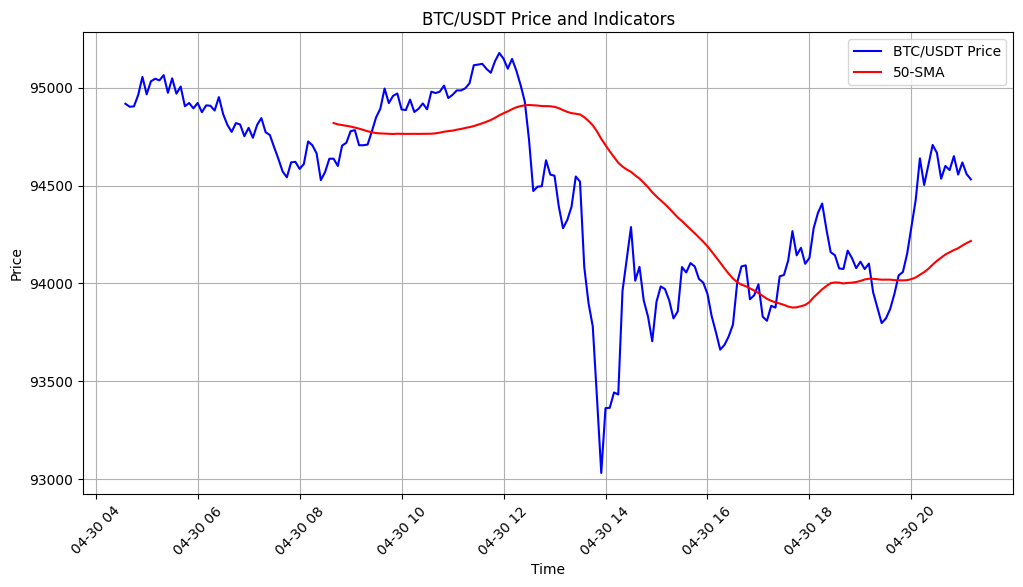

In [2]:
import talib
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Binance
exchange = ccxt.binance()
symbol = 'BTC/USDT'
timeframe = '5m'
limit = 200  # Number of candles to fetch

# Fetch historical data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Calculate indicators
df['sma_50'] = talib.SMA(df['close'], timeperiod=50)
df['rsi'] = talib.RSI(df['close'], timeperiod=14)

# Plot chart
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['close'], label="BTC/USDT Price", color='blue')
plt.plot(df['timestamp'], df['sma_50'], label="50-SMA", color='red')
plt.legend()
plt.title(f"{symbol} Price and Indicators")
plt.xlabel("Time")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid()
plt.show()